In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

from cplAE_TE.utils.load_helpers import get_paths, load_dataset
from cplAE_TE.utils.tree_helpers import HTree, simplify_tree

%matplotlib inline

In [2]:
path = get_paths(warn=False,write_toml=False)

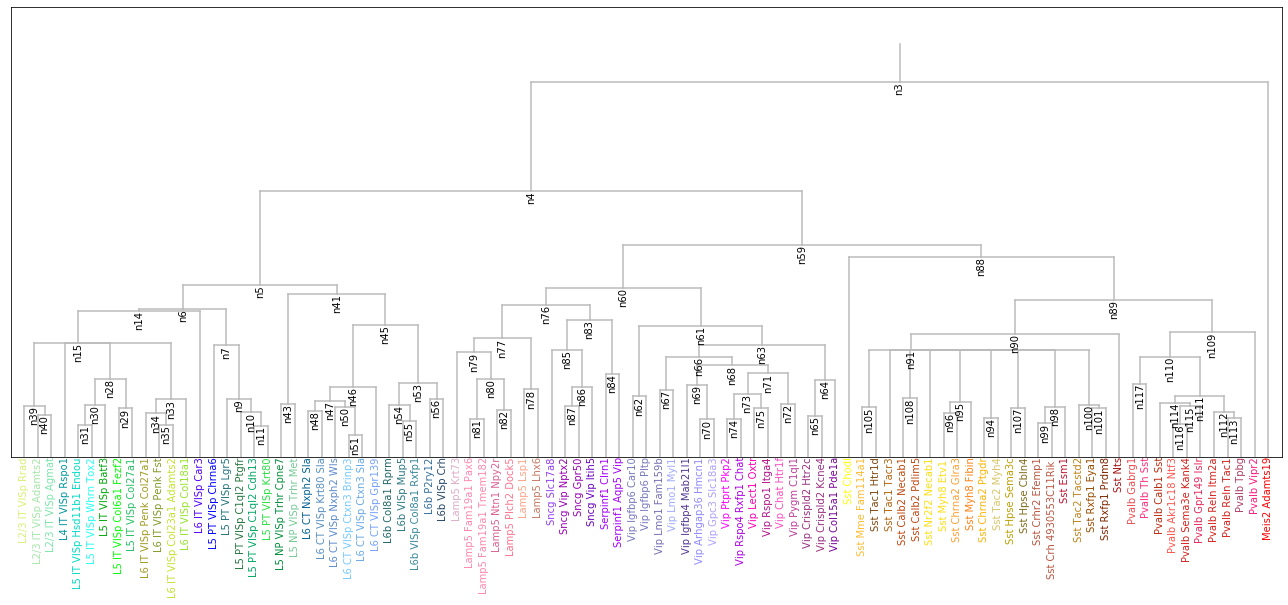

In [3]:
#Load a tree from the .csv file
htree = HTree(htree_file=path['htree'])
htree.plot(figsize=(18,8),fontsize=10)

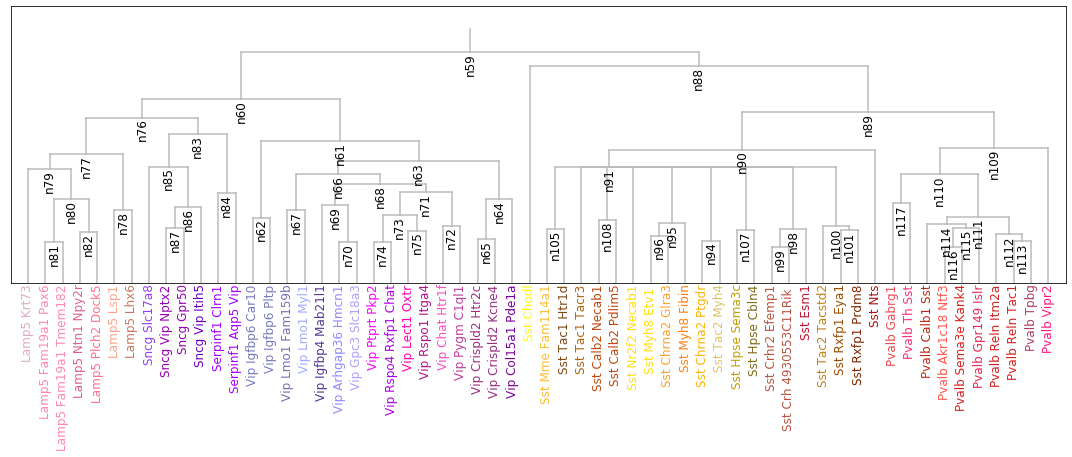

In [4]:
#Extract a subtree from this tree. subtree is a instance of class HTree as well:
inh_subtree = htree.get_subtree(node='n59')
inh_subtree.plot((15,5),fontsize=12)

In [5]:
data = load_dataset(min_sample_thr=10)
kept_classes = data['well_sampled_sorted_t_types'].tolist()

In [6]:
kepttree_nodes=[]
for node in kept_classes:
    kepttree_nodes.extend(inh_subtree.get_ancestors(node))
    kepttree_nodes.extend([node])

In [7]:
kept_subtree_df = inh_subtree.obj2df()
kept_subtree=HTree(htree_df=kept_subtree_df[kept_subtree_df['child'].isin(kepttree_nodes)])

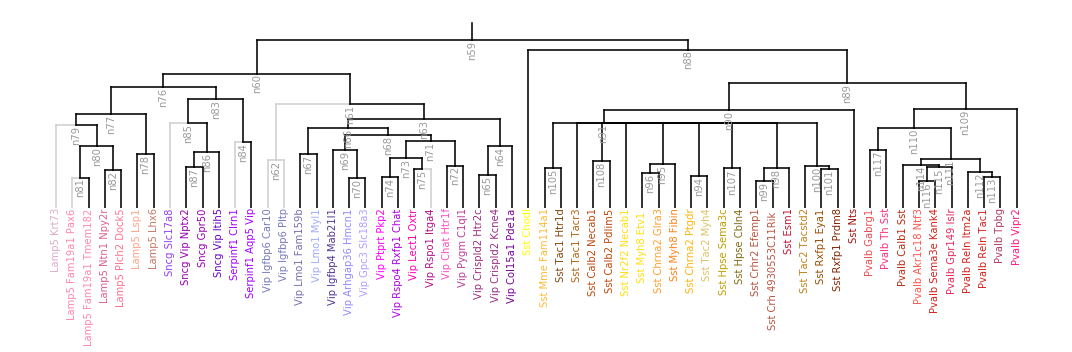

In [8]:
inh_subtree.col[~inh_subtree.isleaf]='#999999'
inh_subtree.plot((15,5),fontsize=10,skeletoncol='#CDCDCD',txtleafonly=False)
kept_subtree.plot((15,5),skeletononly=True,skeletoncol='k',fig=plt.gcf())
ax = plt.gca()
ax.set_xlim(30,95)
ax.axis('off')
plt.tight_layout()

**Simplifying the tree structure based on leafnodes that are well sampled**

In [9]:
simple_tree,simplified_nodes=simplify_tree(pruned_subtree=kept_subtree)

Remove n81 and link ['n80'] to ['Lamp5 Fam19a1 Tmem182']
Remove n85 and link ['n83'] to ['n86']
Remove n79 and link ['n77'] to ['n80']
Remove n75 and link ['n73'] to ['Vip Lect1 Oxtr']
Remove n84 and link ['n83'] to ['Serpinf1 Aqp5 Vip']
Remove n61 and link ['n60'] to ['n63']


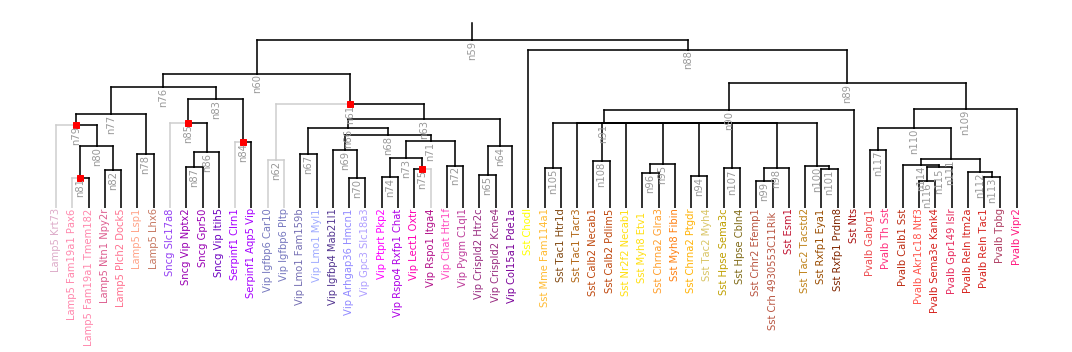

In [10]:
#sns.set_style("whitegrid")
inh_subtree.col[~inh_subtree.isleaf]='#999999'
inh_subtree.plot((15,5),fontsize=10,skeletoncol='#CDCDCD',txtleafonly=False)
kept_subtree.plot((15,5),skeletononly=True,skeletoncol='k',fig=plt.gcf())
ind=np.isin(inh_subtree.child,simplified_nodes)
plt.plot(inh_subtree.x[ind], inh_subtree.y[ind],'s',color='r')
ax = plt.gca()
ax.set_xlim(30,95)
ax.axis('off')
plt.tight_layout()

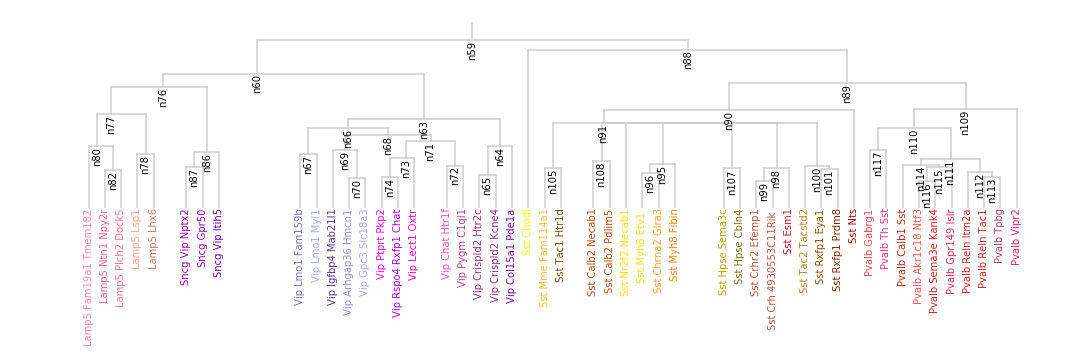

In [11]:
simple_tree.plot((15,5),fontsize=10,skeletoncol='#CDCDCD',txtleafonly=False)
ax = plt.gca()
ax.set_xlim(30,95)
ax.axis('off')
plt.tight_layout()

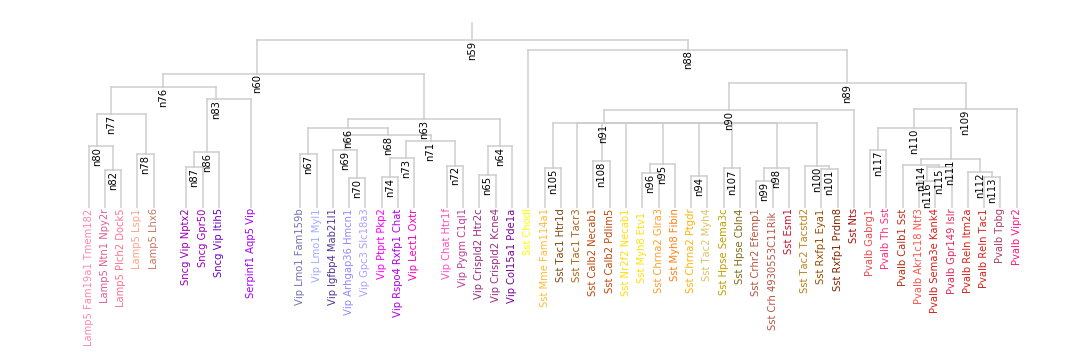

In [11]:
simple_tree.plot((15,5),fontsize=10,skeletoncol='#CDCDCD',txtleafonly=False)
ax = plt.gca()
ax.set_xlim(30,95)
ax.axis('off')
plt.tight_layout()

**Save simple tree to file**

In [12]:
simple_tree_df = simple_tree.obj2df()
simple_tree_filename = '/home/rohan/Dropbox/AllenInstitute/CellTypes/dat/raw/patchseq-v4/dend_RData_Tree_20181220_pruned__test.csv'
simple_tree_df.to_csv(simple_tree_filename,index=False)

**Load simple tree from csv file**

In [ ]:
loaded_tree_df = pd.read_csv(simple_tree_filename)
loaded_tree = HTree(htree_df=loaded_tree_df)
loaded_tree.plot((15,5),fontsize=10,skeletoncol='#CDCDCD',txtleafonly=False)
ax = plt.gca()
ax.set_xlim(30,95)
ax.axis('off')
plt.tight_layout()